In [58]:
import pandas as pd #data manpulation
import numpy as np
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
import scipy

# 1) Cleaning + EDA + Standarization + Encoding 
import chardet #to detetmine dataset encoding

#preprocessing: replace numeric and categorical
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder # label (ordinal or nominal)
from sklearn.preprocessing import OrdinalEncoder # object (no order)
from sklearn.preprocessing import OneHotEncoder # categorical 

# data imbalanced
from imblearn.datasets import make_imbalance # undersampling
from sklearn.utils import resample # oversampling
from imblearn.over_sampling import SMOTE # SMOTE

# 2) Standarize nad change dist of features
from sklearn.preprocessing import StandardScaler # scaling data so mean = 0 and std =  1 by ((x- u) / std)
from scipy import stats # for Box-Cox Transformation stats.boxcox(original_data)[0]
from mlxtend.preprocessing import minmax_scaling # for min_max scaling dont use it
#or
from sklearn.preprocessing import MinMaxScaler,normalize  #Tune input range to be 0 -> 1 by MinMaxScaler, same as above


# 3) feature enginerring
from sklearn.feature_selection import mutual_info_regression #mutal importance of feature
from sklearn.feature_selection import RFE, RFECV 
# a) numeric feature enginering
from sklearn.cluster import KMeans # Kmeans model for cluster feature
from scipy.spatial.distance import cdist # for elpow method
from sklearn.decomposition import PCA # for loadings and adding new feature
# b) categorical feature enginering
from category_encoders import MEstimateEncoder # have m estimator


# 4) Data Modeling = train test split then model then get error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, ShuffleSplit #also has cross_val_score (cv)
from sklearn.model_selection import RepeatedKFold # k fold cross validation it specify cv in corss_val_score dw
from sklearn.model_selection import cross_val_score # cv to get mean and see how much this feature affect the MAE error
# ML algorithms
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# Evaluation for model
from sklearn.metrics import *
from sklearn.metrics import mean_absolute_error, mean_squared_error
#for accurace of regression use model.score(X_test, y_test) mean_absolute_error, mean_squared_error

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
#for accurace of classification use precision, recall, f1, acc, classification_report, confusion_matrix, roc_curve (tpr, fpr) & roc_auc_score (AUC)

# 5) Model summary = features importance and effect + sharp values
import eli5
from eli5.sklearn import PermutationImportance # feature importance
# from pdpbox import pdp, get_dataset, info_plots #for pdp plots
import shap  # package used to calculate Shap values
import time

# 6) DNN & images & audio visualize
import tensorflow as tf

import IPython

#  Start with Data
* features understand
* dtypes
* Error->NaN
* describe

In [127]:
data = pd.read_csv('creditcard.csv')

In [128]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [61]:
# Columns = Time - v1->v28 - amount - class
# Time: time between this transaction and first transaction
# v1->v28: Principal Component Analysis (PCA) of use of credit card info
# Amount: value of transaction
# class: 0->transaction, 1->fraud
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [62]:
#datatypes
data.info() 
#time should be Integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [63]:
#Converting Time to Integer from FLoat
data['Time'] = data['Time'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [64]:
data["Time"].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [65]:
data["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [66]:
#uniques in colum,Amount
#0 in column 'Amount is NaN'
columns = ['Amount']
for col in columns:
    print(col+': has', data[col].nunique(), 'uniques')
    print(sorted(data[col].unique()))
    print()

Amount: has 32767 uniques
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 

In [67]:
data['Amount'] = data['Amount'].replace(0.0, np.nan)

In [68]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,282982.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.919401,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.824374,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.010000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.990000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.490000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,78.000000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


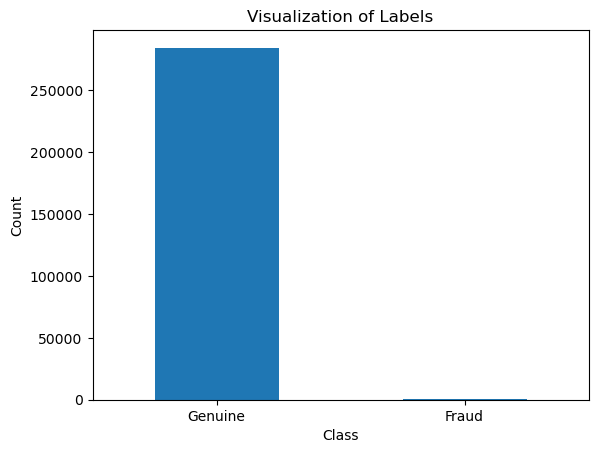

In [69]:
# Visualize the "Labels" column in our dataset

labels = ["Genuine", "Fraud"]
count_classes = data.value_counts(data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [70]:
# determine the number of fraud cases
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_fraction = len(fraud) / float(len(valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))

0.0017304750013189597
Fraud Cases: 492
Valid Cases: 284315


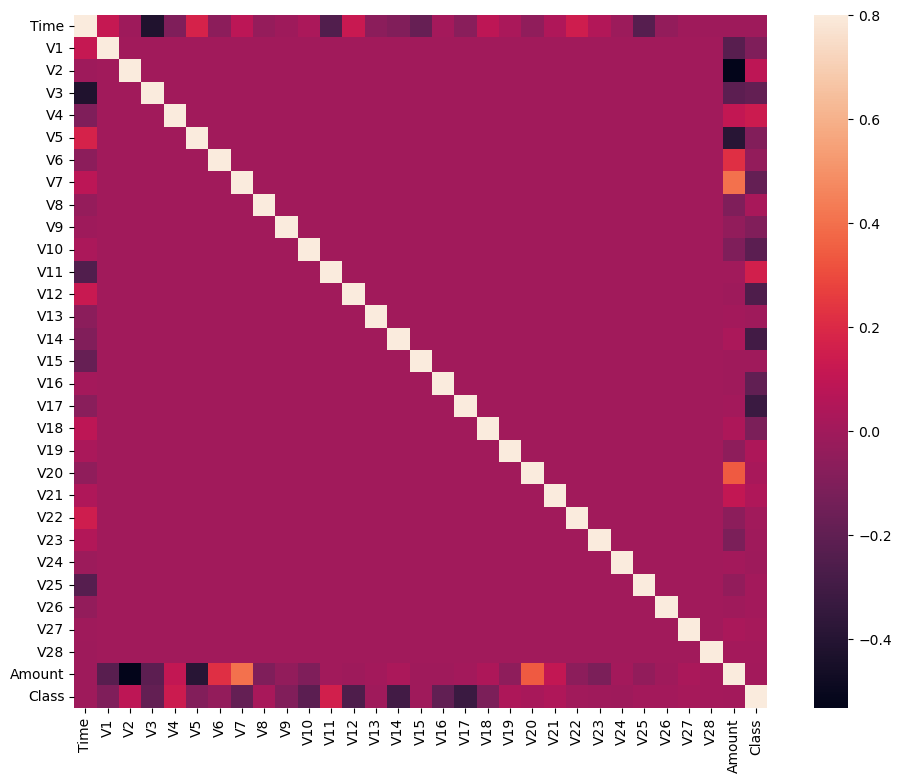

In [71]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

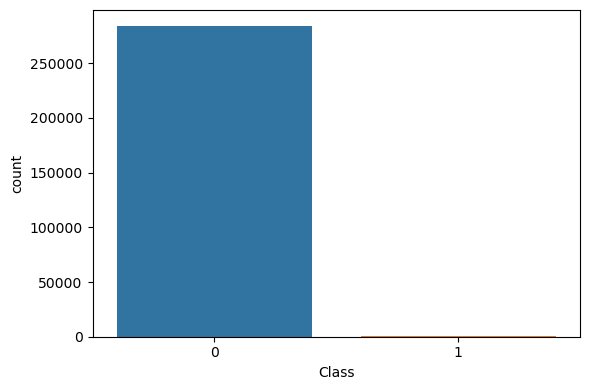

In [72]:
F

# Cleaning
   * NaN
   * Duplicates
   * Outliers
   * Dataconsistency

In [73]:
data.shape

(284807, 31)

In [74]:
data.isnull().sum().max()

1825

In [75]:
(sum(data.isna().sum()) / data.shape[0]) * 100

#percentage of NaN values in all the columns

0.6407848121710491

In [76]:
# duplicates
values = [[1,2,3], [1,2,3]]
new_data = pd.DataFrame(values)
new_data.duplicated() 

0    False
1     True
dtype: bool

In [77]:
listo = data.duplicated()
idx = np.where(listo == True)[0]
data.iloc[idx, :]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [78]:
data = data.drop_duplicates()
#droped all the duplicate values
sum(data.duplicated())
#No duplicate Values

0

In [79]:
# Impute NaN so make train_test_split + see distrbution first so will compute it after duplicates
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
# 284807 record so test_size could be 10% = 28480 record

 Min: 0.01 Max: 25691.16 
 mean: 88.91004166088393 std: 249.84241725750186 
 median: 22.5 
 mode: 1.0


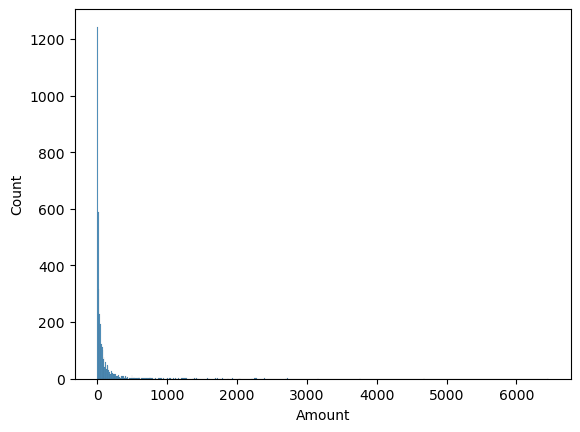

In [80]:
#in this case just see dist and decide which imputer to use on X_train
data = X_train['Amount'].sample(4000, random_state=32)
col = 'Amount'
print(' Min:', X_train[col].min(), 'Max:', X_train[col].max(), '\n mean:', X_train[col].mean(), 'std:', X_train[col].std(),'\n', 'median:', X_train[col].median(), '\n', 'mode:', X_train[col].mode()[0])
sns.histplot(data)
plt.show()
# mean = 89, median = 22.5, mode=1 => best imputer won't be mode (alot of small values) and not mean (outliers exsist)
# so median

In [81]:
median = {}
numeric_imputes = ['Amount']
for col in numeric_imputes:
    median['median_'+str(col)] = X_train[col].median()
median

{'median_Amount': 22.5}

In [82]:
for col in numeric_imputes: # to prevent data leakage
    X_train[col] = X_train[col].replace(np.nan, median['median_'+str(col)])
    X_test[col] = X_test[col].replace([np.nan, 0], median['median_'+str(col)]) # used median on training
X_train.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 255353 entries, 14095 to 202114
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    255353 non-null  int64  
 1   V1      255353 non-null  float64
 2   V2      255353 non-null  float64
 3   V3      255353 non-null  float64
 4   V4      255353 non-null  float64
 5   V5      255353 non-null  float64
 6   V6      255353 non-null  float64
 7   V7      255353 non-null  float64
 8   V8      255353 non-null  float64
 9   V9      255353 non-null  float64
 10  V10     255353 non-null  float64
 11  V11     255353 non-null  float64
 12  V12     255353 non-null  float64
 13  V13     255353 non-null  float64
 14  V14     255353 non-null  float64
 15  V15     255353 non-null  float64
 16  V16     255353 non-null  float64
 17  V17     255353 non-null  float64
 18  V18     255353 non-null  float64
 19  V19     255353 non-null  float64
 20  V20     255353 non-null  float64
 21  V21   

In [83]:
data.isnull().sum().max()

25

 Min: 0.01 Max: 25691.16 
 mean: 88.48404451872945 std: 249.09622775534837 
 median: 22.5 
 mode: 1.0


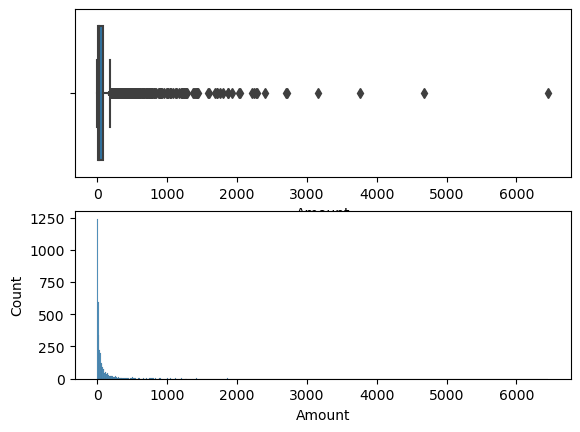

In [84]:
# outliers: only coulmn that could have outlier is Amount so lets see it's boxplot first
fig, axes = plt.subplots(2, 1)
data = X_train['Amount'].sample(4000, random_state=32)
sns.boxplot(x=data, ax=axes[0]) # random 4000 samples to show
col = 'Amount'
print(' Min:', X_train[col].min(), 'Max:', X_train[col].max(), '\n mean:', X_train[col].mean(), 'std:', X_train[col].std(),'\n', 'median:', X_train[col].median(), '\n', 'mode:', X_train[col].mode()[0])
sns.histplot(x=data, ax=axes[1]) # right skewed with alot outliers
plt.show()

 Min: 0.009950330853168083 Max: 8.913301325933324 
 mean: 3.2135622318886936 std: 1.6432696659834662 
 median: 3.1947880083520124 
 mode: 0.6931471805599453


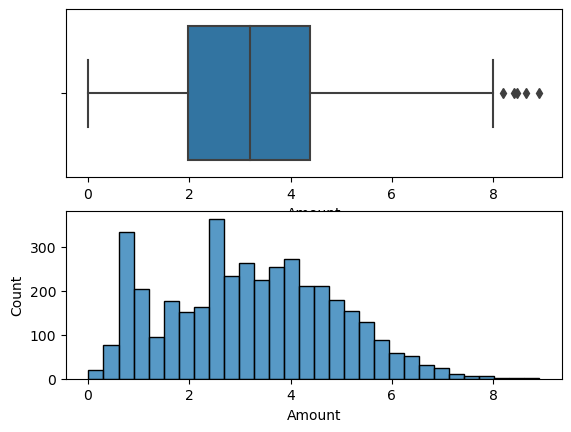

In [85]:
# lets try mathmatical transformer: log as values are large
fig, axes = plt.subplots(2, 1)
data = np.log1p(X_train['Amount'])
data = data.sample(4000)
sns.boxplot(x=data, ax=axes[0]) # random 4000 samples to show
print(' Min:',data.min(), 'Max:', data.max(), '\n mean:', data.mean(), 'std:', data.std(),'\n', 'median:', data.median(), '\n', 'mode:', data.mode()[0])
sns.histplot(x=data, ax=axes[1]) # right skewed with alot outliers
plt.show()

In [86]:
# data seems have still outlier at 8->10 so remove it using IQR bcz we have 'domain knowledge + obviouse outlier'

# target and item_visability are outliers
def remove_outlier(col):
    sorted(col) #sort column then get Q1, Q3 at 25% and 75% of sorted col
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

-1.681534500420246 7.987838984022328
 Min: 0.009950330853168083 Max: 7.987838984022328 
 mean: 3.1730140019066773 std: 1.6366578695600407 
 median: 3.1570004211501135 
 mode: 0.6931471805599453


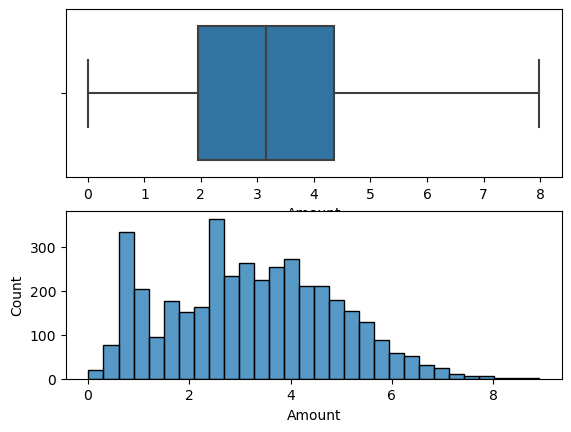

In [87]:
# Experiment 1&2
X_train['Amount'] = np.log1p(X_train['Amount']) # used log and now remove outliers using IQR
X_test['Amount'] = np.log1p(X_test['Amount'])
outliers = ['Amount']
outliers_IQR = outliers
outliers_treatment = []
# train data
for col in outliers_IQR:
    low_item_visability, high_item_visability = remove_outlier(X_train[col]) #lower and upper range
    outliers_treatment.append((col, low_item_visability, high_item_visability))
    
    X_train[col] = np.where(X_train[col] < low_item_visability, low_item_visability, X_train[col])
    X_train[col] = np.where(X_train[col] > high_item_visability, high_item_visability, X_train[col])
    print(low_item_visability, high_item_visability)
    fig, axes = plt.subplots(2, 1)
    sns.boxplot(x=X_train[col], ax=axes[0])
    print(' Min:',X_train[col].min(), 'Max:', X_train[col].max(), '\n mean:', X_train[col].mean(), 'std:', X_train[col].std(),'\n', 'median:', X_train[col].median(), '\n', 'mode:', X_train[col].mode()[0])
    sns.histplot(x=data, ax=axes[1]) # right skewed with alot outliers
    plt.show()
    
# test data to prevent data leakage
for (col, low_item_visability, high_item_visability) in outliers_treatment:
    # outliers_treatment
    X_test[col] = np.where(X_test[col] < low_item_visability, low_item_visability, X_test[col])
    X_test[col] = np.where(X_test[col] > high_item_visability, high_item_visability, X_test[col])

In [88]:
# no data inconsistency so save cleaned data
'''
1. test is imputed already.
2. X_test['Amount'] = np.log1p(X_test['Amount']) + IQR of training -> is already done.
'''
X_train.to_csv('X_train.csv', index=False)

# 3) EDA (Explinatory Data Analysis)

### Univariate Analysis

From EDA 

**For each variable (independant = (features)) or (dependant = (Label)) get 1, 2, 3 by a & b**

1) dtype, count, unique values

2) min, max, mean, median, mode, std

3) dist + skewness & count (pie or countplot) 


* a) numeric variable: distrbution of each feature.
* b) categorical variable: percentages by pie_chart (or) Groupby if high cardinality.

### bivariate Analysis

**Relation between independant variable and target (dependant variable)**

1) **corr matrix** by heatmap (remove one feature corr btn them is very large corr > 0.9, as they should be independant variables)

2) a, b & c

a) Numerical vs. Numerical
1. **Scatterplot**
2. Line plot (for trends)
3. Heatmap for correlation (correlation matrix) .corr
4. Joint plot

b) Categorical vs. Numerical
1. Bar chart
2. Violin plot
3. Categorical box plot
4. **Swarm plot**

c) Two Categorical Variables
1. **Bar chart**
2. Grouped bar chart
3. Point plot

### Multivariate Analysis

**just use pairplot**

In [89]:
X_train = pd.read_csv('X_train.csv')

In [90]:
y_train = pd.DataFrame(y_train.values, columns=['Class'])
y_test = pd.DataFrame(y_test.values, columns=['Class'])
y_train['Class']

0         0
1         0
2         0
3         0
4         0
         ..
255348    0
255349    0
255350    0
255351    0
255352    0
Name: Class, Length: 255353, dtype: int64

 Min: 0 Max: 172792 
 mean: 94814.56323207481 std: 47484.15962094818 
 median: 84713.0 
 mode: 3770


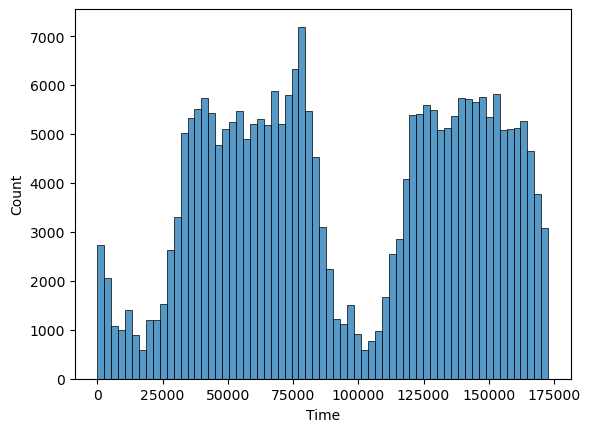

 Min: -56.407509631329 Max: 2.45492999121121 
 mean: 0.005797174737759308 std: 1.9454156472835498 
 median: 0.019071216810888 
 mode: 2.05579700630039


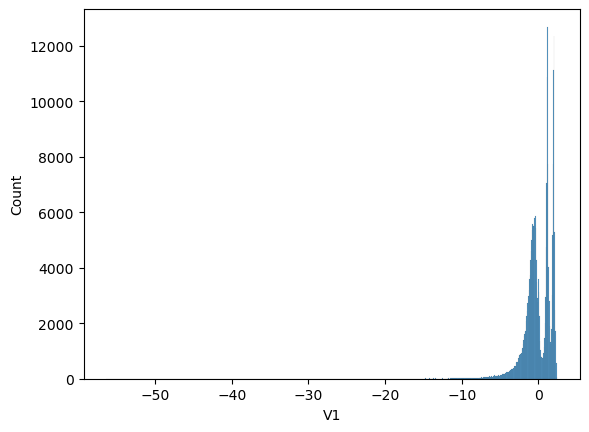

 Min: -72.7157275629303 Max: 22.0577289904909 
 mean: -0.004258235340802067 std: 1.6370234076511467 
 median: 0.0642032484438426 
 mode: -0.32666777306077


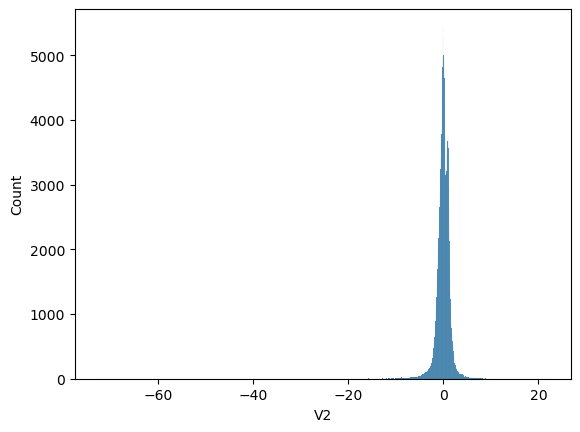

 Min: -48.3255893623954 Max: 9.38255843282114 
 mean: 0.002386121357806502 std: 1.5112459172491193 
 median: 0.181131178399056 
 mode: -2.75204095570008


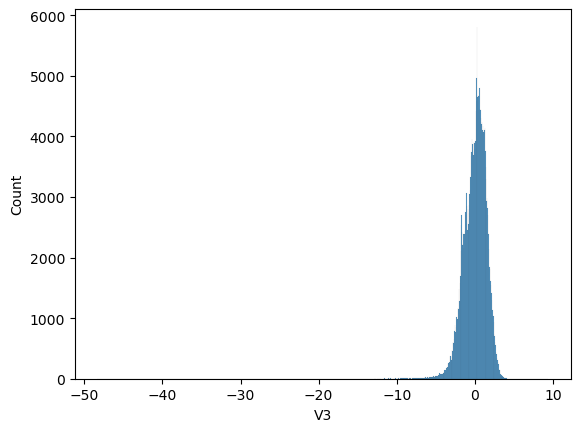

 Min: -5.68317119816995 Max: 16.8753440335975 
 mean: -0.0020148461727903595 std: 1.4157842538832932 
 median: -0.022047672109969 
 mode: -0.842316033286871


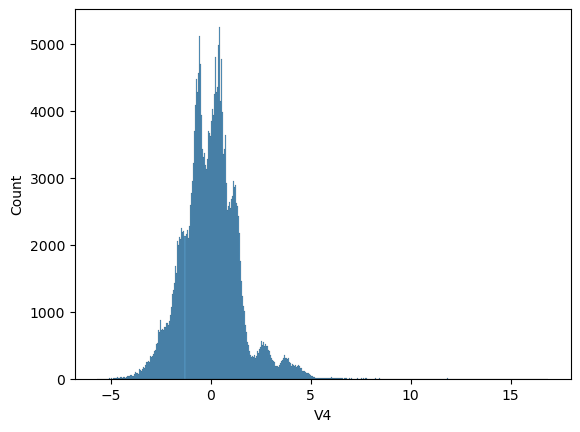

 Min: -113.743306711146 Max: 34.8016658766686 
 mean: 0.002065582789117035 std: 1.3742629924741905 
 median: -0.0527635750272838 
 mode: 2.46307225982454


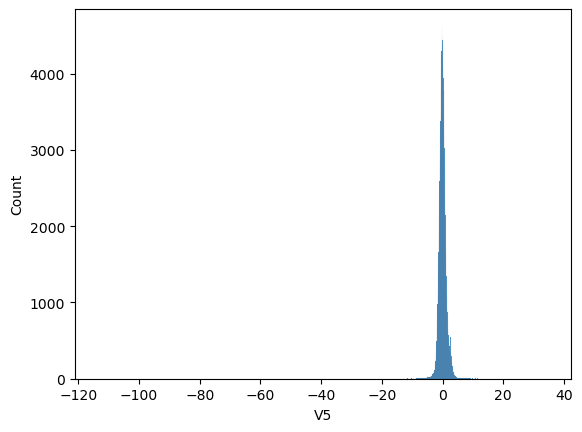

 Min: -26.1605059358433 Max: 73.3016255459646 
 mean: -0.0017515572518647376 std: 1.3297441956928333 
 median: -0.275968966305145 
 mode: 3.17385642307029


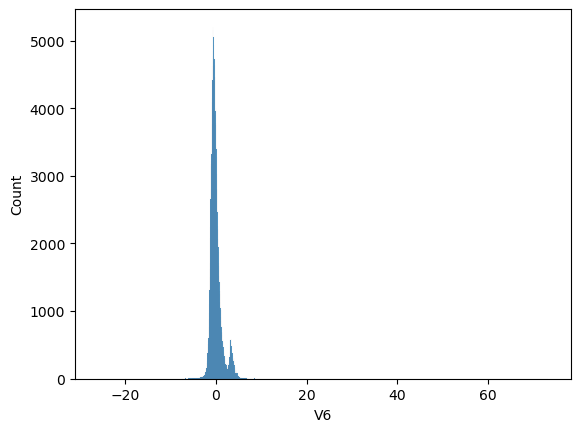

 Min: -43.5572415712451 Max: 120.589493945238 
 mean: 0.0019387054613786898 std: 1.2274300157325617 
 median: 0.0414615453806532 
 mode: -0.432125923987824


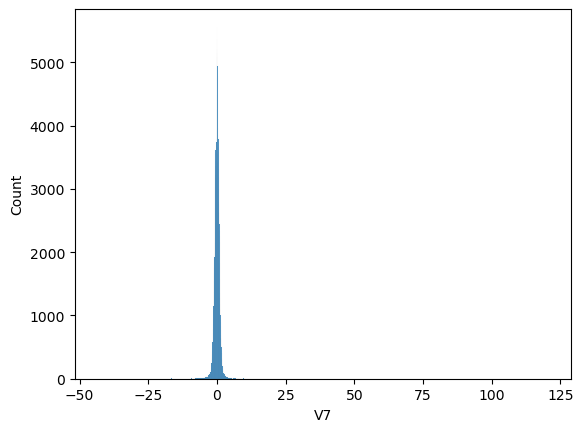

 Min: -73.2167184552674 Max: 20.0072083651213 
 mean: -0.00014002953679083112 std: 1.1741320192149425 
 median: 0.0219029771195089 
 mode: 0.727706200727824


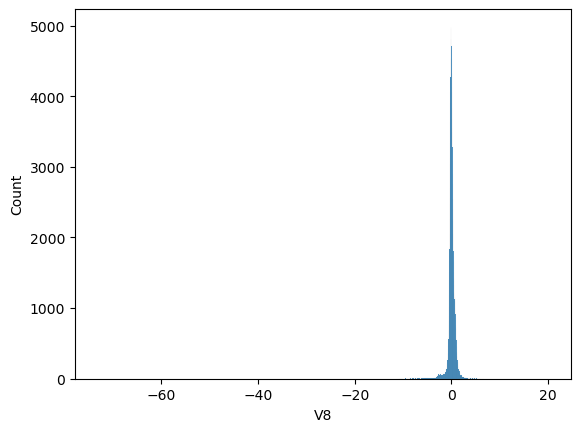

 Min: -13.4340663182301 Max: 15.5949946071278 
 mean: -0.0017901407162681728 std: 1.0961869891575082 
 median: -0.0528053107421851 
 mode: 0.608605870267216


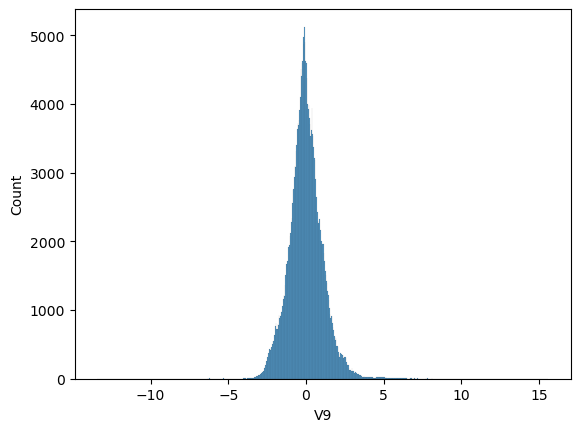

 Min: -24.5882624372475 Max: 23.7451361206545 
 mean: -0.0017012160800650028 std: 1.0772463952887683 
 median: -0.0932279079287626 
 mode: -0.0751861699398929


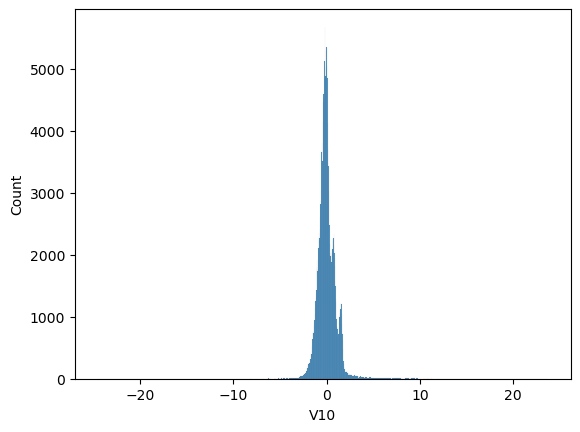

 Min: -4.79747346479757 Max: 12.0189131816199 
 mean: 0.00014756181491144303 std: 1.0187886854198218 
 median: -0.033100250334269 
 mode: 0.0635044576008839


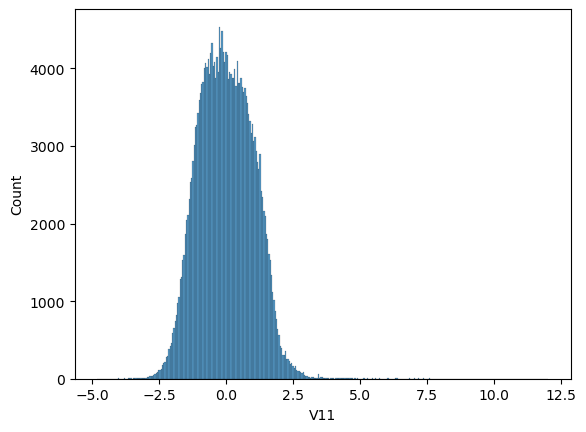

 Min: -18.6837146333443 Max: 7.8483920756446 
 mean: -0.0024584272464942664 std: 0.9963502313271679 
 median: 0.137679877809554 
 mode: 0.350563573253678


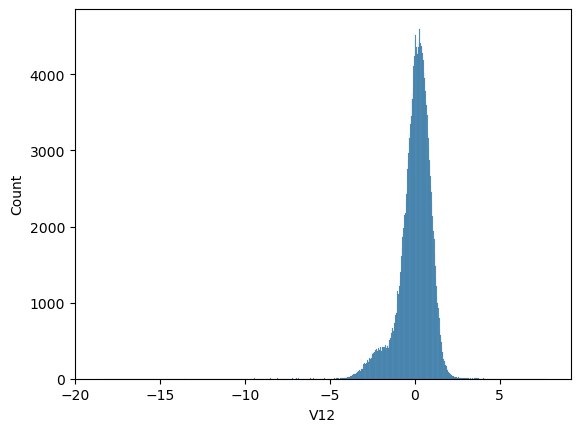

 Min: -5.79188120632084 Max: 7.12688295859376 
 mean: 0.0008055063444487495 std: 0.9949697997850115 
 median: -0.0123892082868271 
 mode: -0.141238322200309


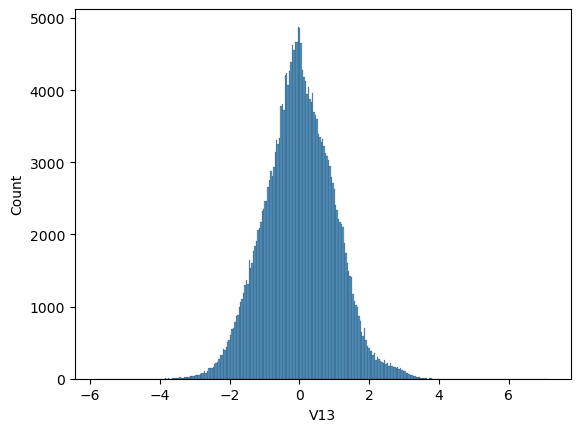

 Min: -19.2143254902614 Max: 10.5267660517847 
 mean: 0.0004032076677556299 std: 0.9519750660359977 
 median: 0.0497814997789476 
 mode: 0.690971618395625


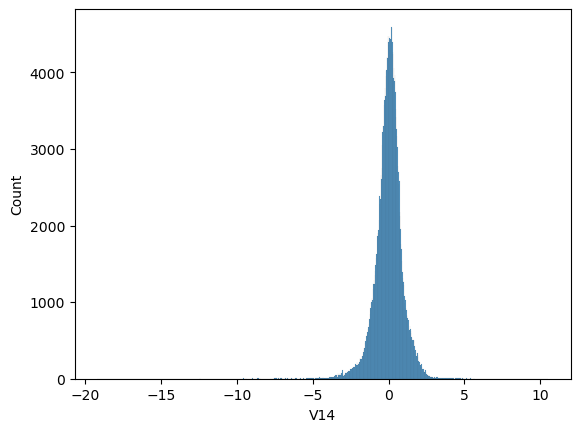

 Min: -4.49894467676621 Max: 8.87774159774277 
 mean: 0.0005155091813094343 std: 0.9144420374211873 
 median: 0.0487533930994553 
 mode: 1.2752570390935


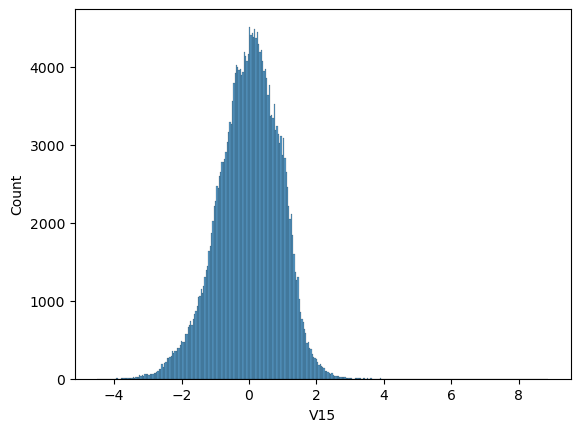

 Min: -14.1298545174931 Max: 17.3151115176278 
 mean: 0.0012971762250386261 std: 0.8741937288126531 
 median: 0.0669254956581903 
 mode: -0.371962125028419


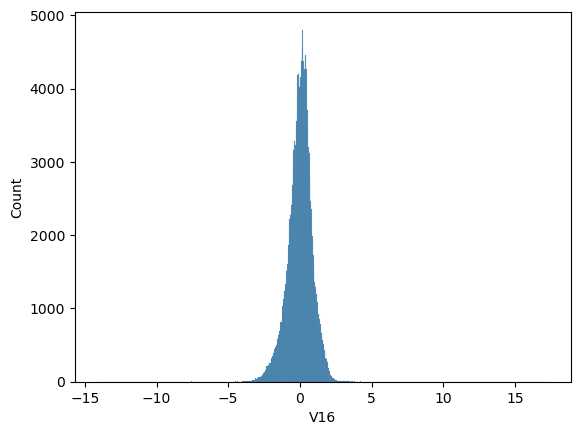

 Min: -25.1627993693248 Max: 9.25352625047285 
 mean: 0.0010589458588722352 std: 0.8442742945139233 
 median: -0.0652013315403838 
 mode: -0.601956802828445


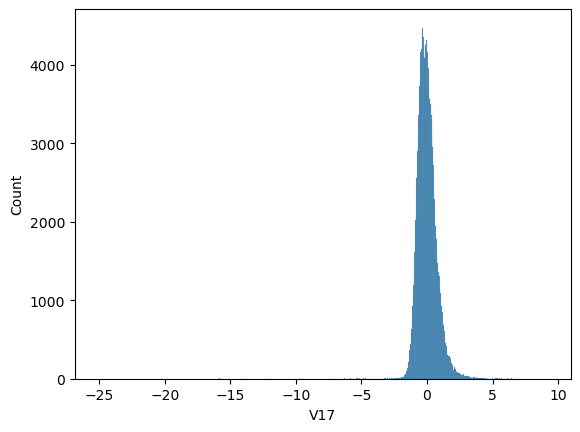

 Min: -9.49874592104677 Max: 5.04106918541184 
 mean: 0.0006244613334028926 std: 0.8372687640347577 
 median: -0.0029699299419083 
 mode: -0.0526401462570187


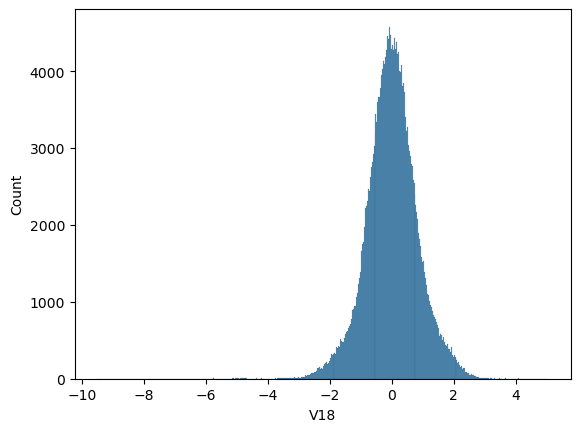

 Min: -7.21352743017759 Max: 5.59197142733558 
 mean: 0.00016067664917951286 std: 0.8129769703903578 
 median: 0.0037724403187947 
 mode: -0.330590448442944


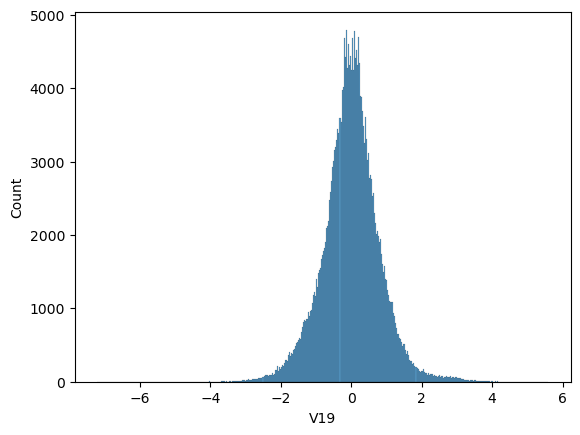

 Min: -54.497720494566 Max: 39.4209042482199 
 mean: -0.00014764734573705703 std: 0.7673053921577815 
 median: -0.0621692638995121 
 mode: -0.180370118559693


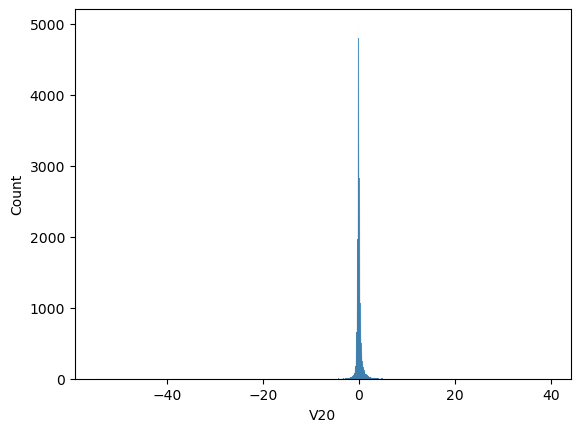

 Min: -34.8303821448146 Max: 27.2028391573154 
 mean: -0.0006536608695576958 std: 0.7211367026194615 
 median: -0.0294340953544673 
 mode: 0.269764951361357


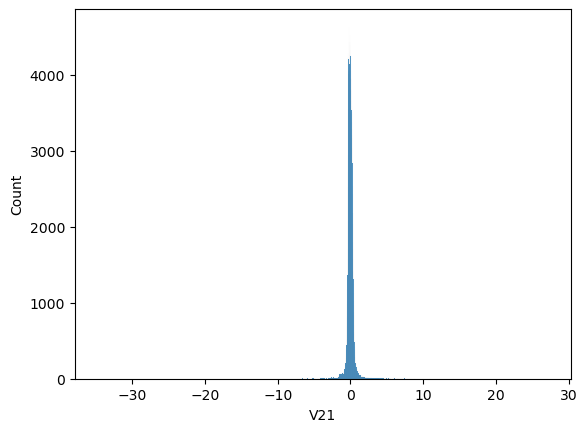

 Min: -10.933143697655 Max: 10.5030900899454 
 mean: 9.073902797955326e-05 std: 0.7248084070077778 
 median: 0.0065397992134195 
 mode: 0.844626646775712


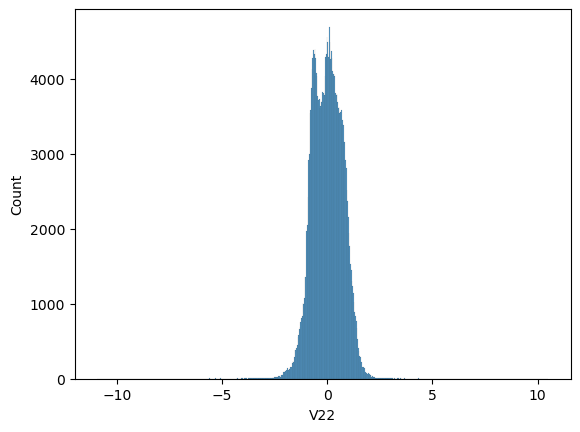

 Min: -44.8077352037913 Max: 20.8033440994696 
 mean: 0.0004538543373242342 std: 0.6180412741083724 
 median: -0.01124862448568 
 mode: 0.0206746676928111


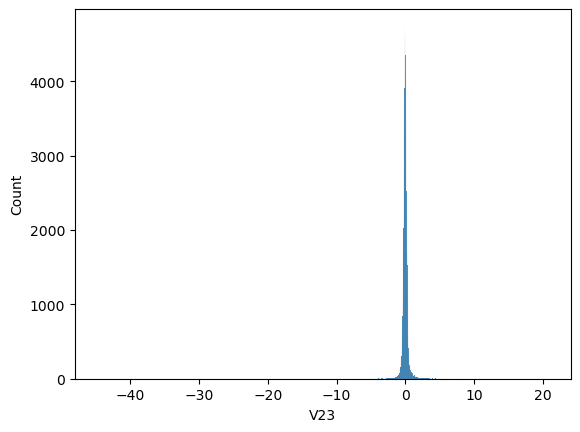

 Min: -2.83662691870341 Max: 4.58454913689817 
 mean: 0.0007759009031199629 std: 0.6054697433201802 
 median: 0.0412054542552819 
 mode: 0.726211883811499


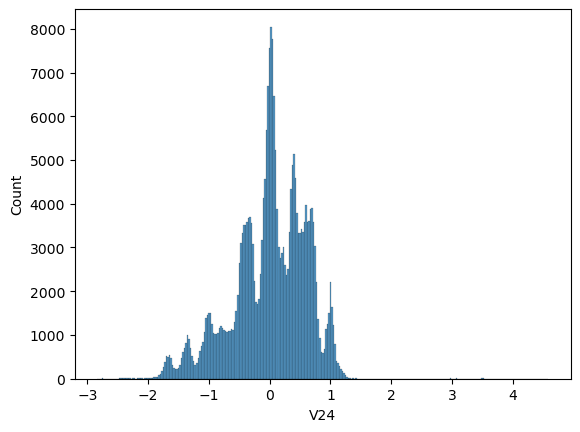

 Min: -10.2953970749851 Max: 7.51958867870916 
 mean: -0.0007829539578710136 std: 0.5210667465051678 
 median: 0.0160808346306451 
 mode: 0.366624307004913


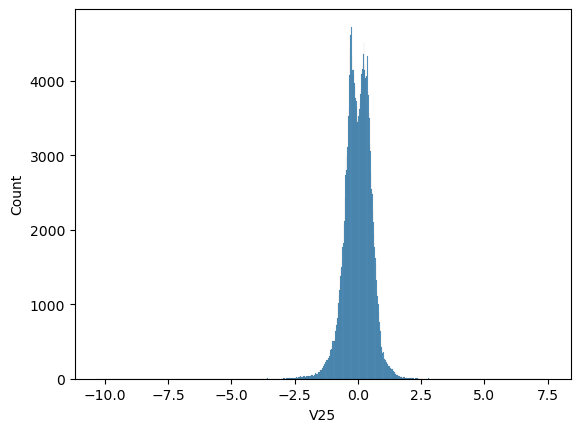

 Min: -2.60455055280817 Max: 3.5173456116238 
 mean: -7.592102395880121e-06 std: 0.4818539902320387 
 median: -0.051976353199389 
 mode: -0.398827514959463


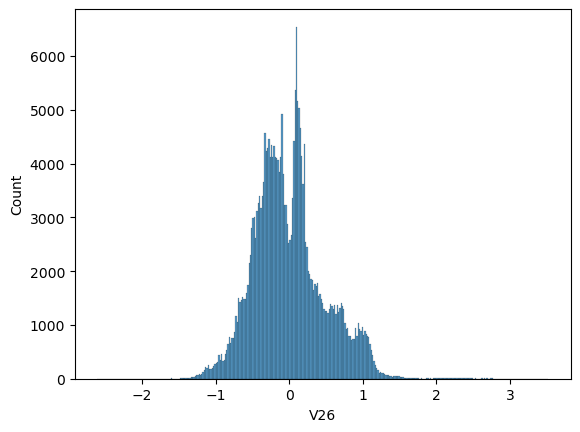

 Min: -22.5656793207827 Max: 31.6121981061363 
 mean: 0.001629642584140929 std: 0.39542977575358534 
 median: 0.0014507056411535 
 mode: 0.0277351215052822


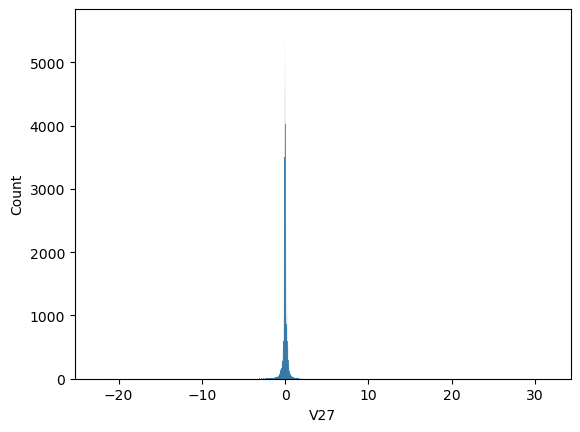

 Min: -15.4300839055349 Max: 33.8478078188831 
 mean: 0.00044643127129999376 std: 0.32790186875548116 
 median: 0.0113238209653658 
 mode: -0.0602821510762213


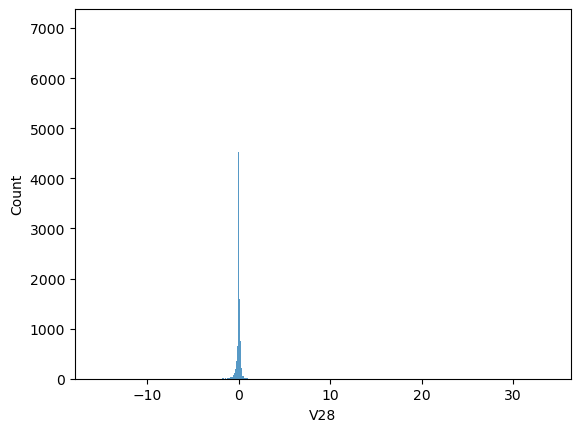

 Min: 0.009950330853168 Max: 7.987838984022328 
 mean: 3.1730140019066773 std: 1.6366578695600407 
 median: 3.157000421150113 
 mode: 0.6931471805599453


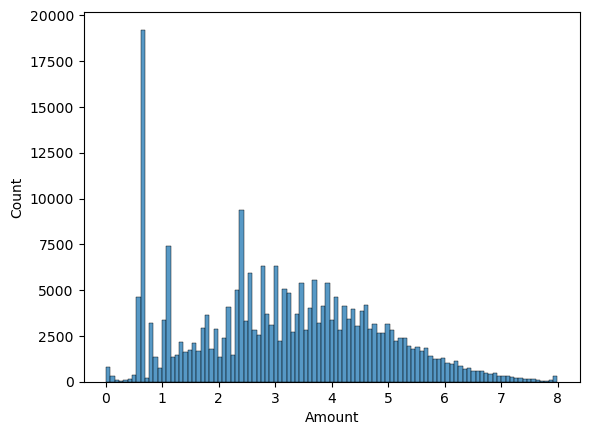

In [91]:
#### univariate analysis
# numeric: now we know dist of each variable
columns = X_train.columns
for col in columns:
    print(' Min:',X_train[col].min(), 'Max:', X_train[col].max(), '\n mean:', X_train[col].mean(), 'std:', X_train[col].std(),'\n', 'median:', X_train[col].median(), '\n', 'mode:', X_train[col].mode()[0])
    sns.histplot(x=X_train[col]) # right skewed with alot outliers
    plt.show()

In [92]:
# time is unskewed
# v1->v28 have normal dist.
# Amount passed on mathmatical transformer + IQR to make it normal dist

### Target class is imbalanced  
**If feature is imbalanced you can remove it or model overfit on some value but if label is imbalanced you must solve it using one of this 3 methods:**

* 1. Undersampling Majority class (lose patterns but good for small dataset)
* 2. Oversampling Minority class (don't lose patterns but overfit)
* 3. SMOTE (generate data from old data)

you can increase test size using method 2 (method 1 remove & method 3 predict values which could be incorrect only choice is method 2) called **upsampling** test to make model have more confidentiality about results

In [95]:
# data imbalanced
from sklearn.feature_selection import RFE, RFECV
from sklearn.utils import resample
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE

## a) Undersampling
use at large dataset but lose patterns

In [96]:
# solve Target Imbalanced b4 standardScaler

y_train.value_counts()

Class
0        254932
1           421
dtype: int64

In [97]:
y.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [98]:
from imblearn.datasets import make_imbalance # 0:(400 or <= 423) of y_train
X_train_1, y_train_1 = make_imbalance(X_train, y_train, sampling_strategy={0: 400, 1:400}, random_state=5)
X_train_1.shape, y_train_1.shape # 800 records

((800, 30), (800, 1))

In [99]:
y_train_1.value_counts()

Class
0        400
1        400
dtype: int64

## b) Oversampling
use at small datasets (dont lose patterns) + may overfit

In [100]:
def upsample_classes(data, target):
    # example: 0->800, 1->200, 2->100, 3->300
    lst = list(data[target].unique()) #0,1,2,3
    
    classes = [] # all records in list
    for c in lst:
        classes.append(data[data[target] == c])
    
    length = 0
    class_lab = None
    for c in classes:
        if len(c)>length:
            length=len(c)
            class_lab = c
    class_lab = class_lab[target].unique()[0] # majority_class_label = 0
    
    df_regroup = pd.concat(classes) # all records in df but sorted (0000011223) in df
    maj_class = df_regroup[df_regroup[target] == class_lab] # df contains maj_class (800 record)

    lst.remove(class_lab) # removed majority class and loop on reset -> resample (put dublicates until )
    
    new_classes=[]
    for i in lst:
        new_classes.append(resample(data[data[target] == i], replace=True, n_samples=len(maj_class)))

    minority_classes = pd.concat(new_classes) # 3 class togthers
    upsample = pd.concat([df_regroup[df_regroup[target]==class_lab], minority_classes]) # 3 minority + 1 majority

    return upsample

In [101]:
train = pd.concat([X_train,y_train], axis=1)
train_balanced = (upsample_classes(train, 'Class'))
X_train_2 = train_balanced.drop(['Class'], axis=1)
y_train_2 = train_balanced.Class
X_train_2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,25083,1.300830,-1.225502,0.858792,-1.099371,-1.610322,-0.251067,-1.271601,-0.141362,-0.419379,...,-0.188087,-0.126514,0.178441,-0.038959,0.026458,0.235470,-0.122894,0.030386,0.033010,4.553877
1,122046,-0.184610,1.208173,-0.304496,-0.707281,0.996500,-0.350023,0.880677,-1.057235,-0.135156,...,-0.052306,0.450683,-0.879879,0.162633,0.665603,-0.467143,0.049843,-0.029762,-0.147477,2.771964
2,30362,0.970798,-0.064282,0.592810,0.985636,0.351021,1.795821,-0.471505,0.659789,0.203243,...,-0.283711,-0.085456,0.057130,0.144305,-1.037305,0.177829,-0.414363,0.106793,0.001787,1.766442
3,44208,1.097469,-0.326775,1.327956,0.978179,-1.380070,-0.512058,-0.647417,0.102625,1.065165,...,-0.116188,-0.063521,-0.112048,0.056718,0.720115,0.163279,0.296986,0.004618,0.033657,3.713328
4,150446,2.059226,0.030605,-1.861336,0.220748,0.575576,-0.360433,0.009675,-0.011166,0.403704,...,-0.194041,-0.349191,-0.979708,0.291917,0.073754,-0.269067,0.181096,-0.073107,-0.046616,0.828552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206459,101051,-1.465316,-1.093377,-0.059768,1.064785,11.095089,-5.430971,-9.378025,-0.446456,1.992110,...,-1.457610,1.160623,-1.259697,-15.981649,-0.883670,-3.536716,-0.592965,0.675525,0.424849,0.652325
172654,137211,0.630579,1.183631,-5.066283,2.179903,-0.703376,-0.103614,-3.490350,1.094734,-0.717418,...,0.357369,0.621622,0.043807,0.102711,-0.601505,0.127371,-0.163009,0.853792,0.356503,3.700067
172306,47545,1.176716,0.557091,-0.490800,0.756424,0.249192,-0.781871,0.228750,-0.040840,-0.432111,...,-0.102772,-0.062166,-0.128168,-0.040176,0.110040,0.437891,0.368809,-0.018287,0.031173,0.565314
167894,41204,-8.440284,6.147653,-11.683706,6.702780,-8.155839,-3.716264,-12.407313,5.626571,-6.232161,...,0.520732,2.192855,-0.282597,0.008068,0.403858,-0.018788,0.522722,0.792691,0.067790,3.442339


In [102]:
X_train_2.shape, y_train_2.shape

((509864, 30), (509864,))

In [103]:
y_train_2.value_counts()

0    254932
1    254932
Name: Class, dtype: int64

In [104]:
X_train_2.duplicated().sum() # half of data is dublicated 

254511

In [105]:
train_balanced.duplicated().sum() # if we removed duplicates length will be (509860 new_df - 254507 duplicates = 255353)
# if you removed duplicates it will return as orignal df which has 255353 records consist of 254930 class 0 and 423 class 1

254511

### c) SMOTE
* generate new data from old data

In [106]:
smote = SMOTE(random_state = 14)

X_train_3, y_train_3 = smote.fit_resample(X_train, y_train)

In [107]:
X_train_3

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,25083,1.300830,-1.225502,0.858792,-1.099371,-1.610322,-0.251067,-1.271601,-0.141362,-0.419379,...,-0.188087,-0.126514,0.178441,-0.038959,0.026458,0.235470,-0.122894,0.030386,0.033010,4.553877
1,122046,-0.184610,1.208173,-0.304496,-0.707281,0.996500,-0.350023,0.880677,-1.057235,-0.135156,...,-0.052306,0.450683,-0.879879,0.162633,0.665603,-0.467143,0.049843,-0.029762,-0.147477,2.771964
2,30362,0.970798,-0.064282,0.592810,0.985636,0.351021,1.795821,-0.471505,0.659789,0.203243,...,-0.283711,-0.085456,0.057130,0.144305,-1.037305,0.177829,-0.414363,0.106793,0.001787,1.766442
3,44208,1.097469,-0.326775,1.327956,0.978179,-1.380070,-0.512058,-0.647417,0.102625,1.065165,...,-0.116188,-0.063521,-0.112048,0.056718,0.720115,0.163279,0.296986,0.004618,0.033657,3.713328
4,150446,2.059226,0.030605,-1.861336,0.220748,0.575576,-0.360433,0.009675,-0.011166,0.403704,...,-0.194041,-0.349191,-0.979708,0.291917,0.073754,-0.269067,0.181096,-0.073107,-0.046616,0.828552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509859,102642,-4.055281,4.851608,-8.673226,6.029728,-3.266330,-1.746877,-4.731120,2.174492,-3.369589,...,0.158292,1.259934,0.923545,-0.045964,-0.429702,-0.415793,-0.022607,0.290242,-0.344130,4.687529
509860,7530,0.334105,3.849250,-5.986395,5.937308,1.913678,-2.219318,-0.823075,0.099733,-2.666874,...,0.440455,0.179724,-0.609186,-0.666347,-0.982041,1.575492,0.547324,0.546897,0.407640,0.693147
509861,21175,-17.108482,9.824350,-23.898108,11.818214,-9.958123,-2.537431,-17.417757,1.971934,-6.257005,...,0.998402,-2.333304,0.961672,1.260942,-1.052481,0.063622,0.674878,2.103288,-1.422718,0.693147
509862,149755,-0.970677,1.198284,-5.285081,3.269012,-0.120326,-1.253721,-1.159835,0.681727,-1.661330,...,-0.163386,0.356112,0.383742,0.209985,0.352851,-0.155235,-0.191931,0.221275,-0.014975,2.113304


In [108]:
X_train_3.shape, y_train_3.shape

((509864, 30), (509864, 1))

In [109]:
y_train_3.value_counts()

Class
0        254932
1        254932
dtype: int64

In [110]:
# Experiment 5&6
X_train = X_train_1
y_train = y_train_1

<AxesSubplot:>

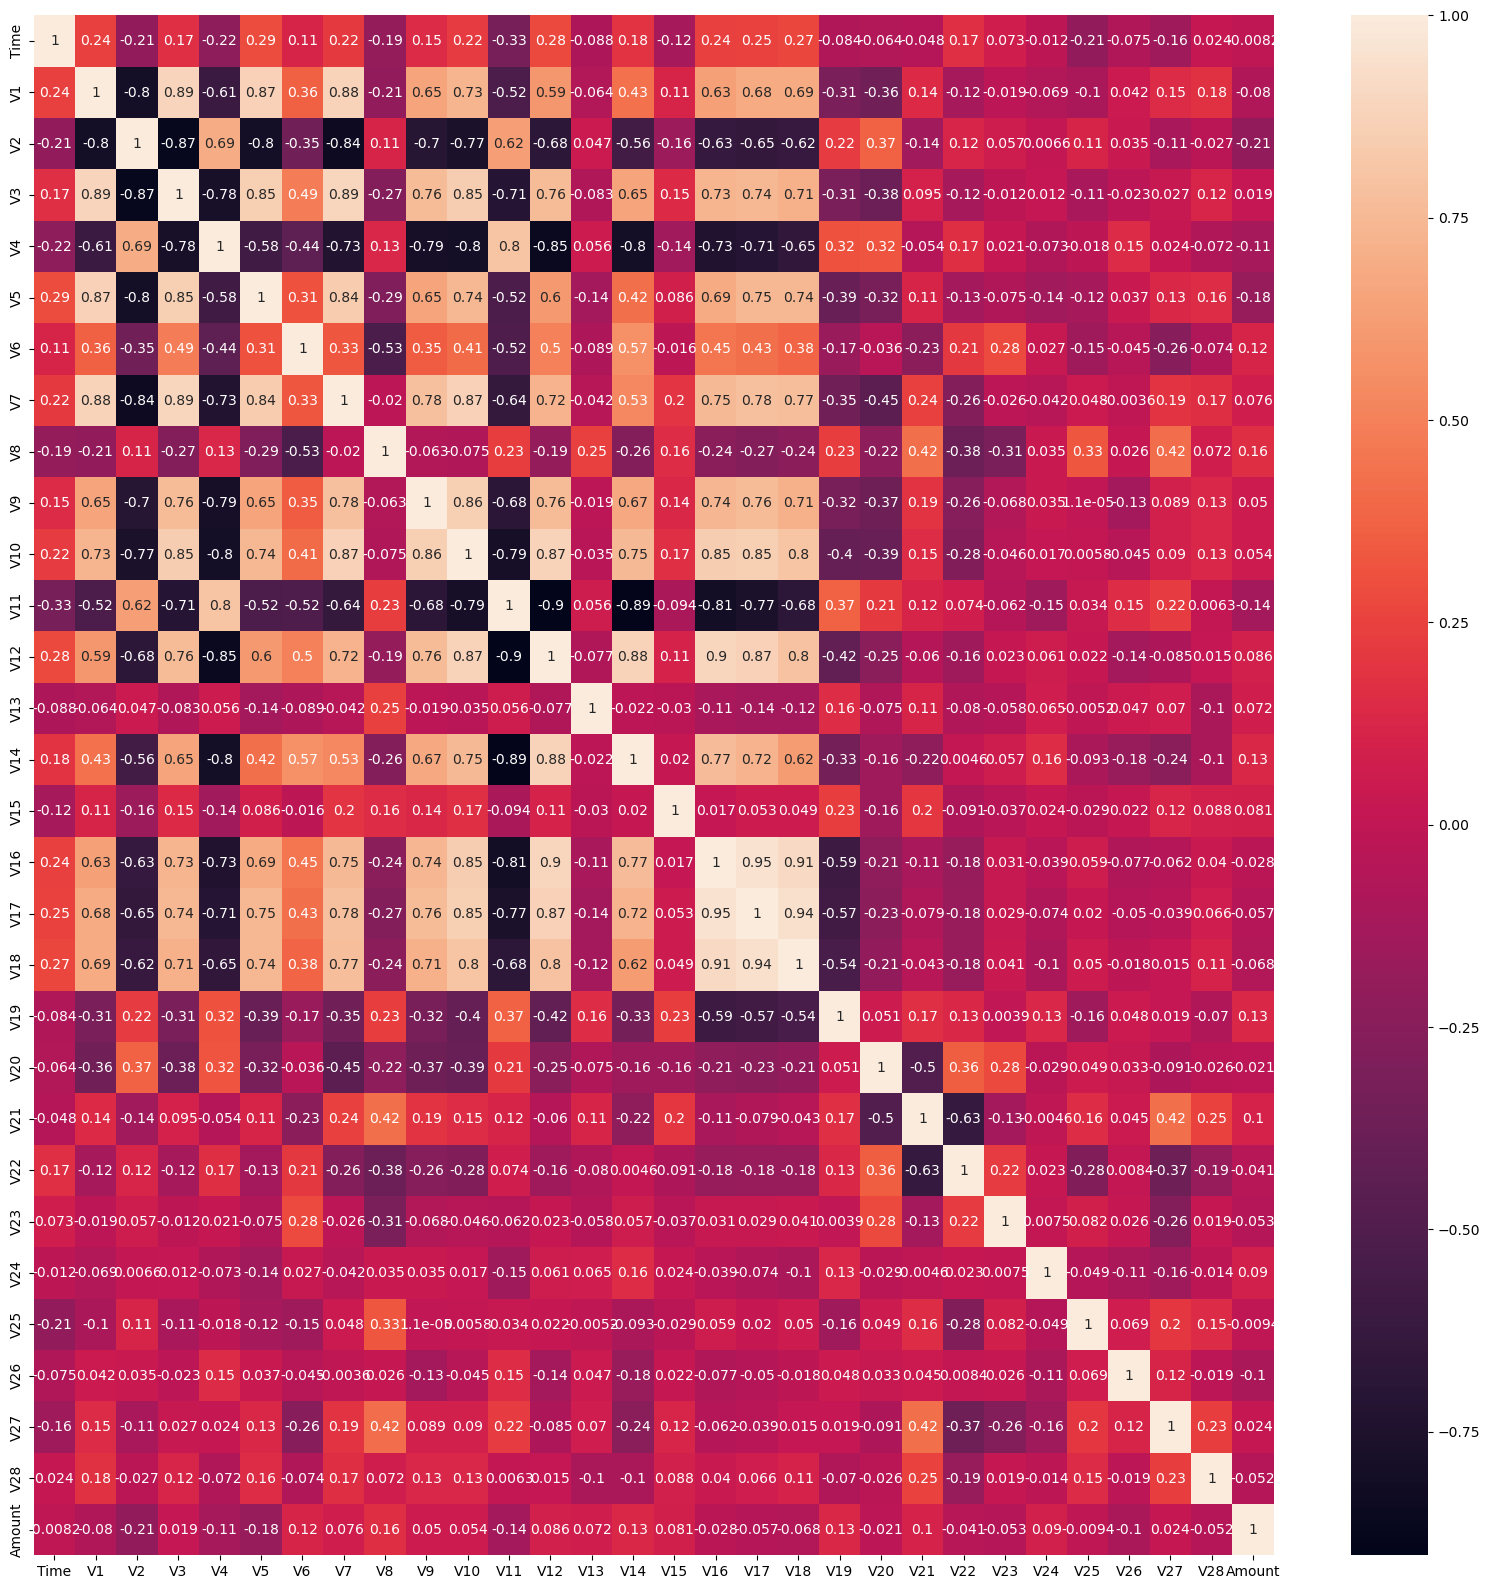

In [111]:
#### bivariate analysis
plt.figure(figsize=(20, 20))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, annot=True)

In [112]:
# corr btn -0.45 -> 0.17 so this is good as independant variables don't have relation ship btn each other
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,0.244988,-0.208091,0.170964,-0.221728,0.291748,0.113976,0.216980,-0.191223,0.151708,...,-0.063761,-0.048265,0.172392,0.072502,-0.011552,-0.209968,-0.075493,-0.155518,0.023621,-0.008229
V1,0.244988,1.000000,-0.799076,0.885415,-0.612664,0.869211,0.363065,0.876266,-0.209217,0.652697,...,-0.356751,0.138315,-0.119812,-0.019065,-0.068540,-0.100629,0.041554,0.146640,0.175185,-0.080247
V2,-0.208091,-0.799076,1.000000,-0.867859,0.693599,-0.799205,-0.349024,-0.838526,0.113406,-0.704503,...,0.371148,-0.144327,0.120124,0.057121,0.006597,0.114908,0.035131,-0.108346,-0.026986,-0.206479
V3,0.170964,0.885415,-0.867859,1.000000,-0.780007,0.853582,0.485066,0.890274,-0.267412,0.757719,...,-0.376291,0.095232,-0.115834,-0.011501,0.012447,-0.113585,-0.023346,0.027066,0.116980,0.018559
V4,-0.221728,-0.612664,0.693599,-0.780007,1.000000,-0.580266,-0.436275,-0.728412,0.125565,-0.789829,...,0.317366,-0.054221,0.167387,0.021414,-0.073018,-0.018087,0.150905,0.024259,-0.071704,-0.114869
V5,0.291748,0.869211,-0.799205,0.853582,-0.580266,1.000000,0.310208,0.842316,-0.286131,0.650792,...,-0.321849,0.108561,-0.131316,-0.074789,-0.139501,-0.120956,0.036652,0.132664,0.156868,-0.183759
V6,0.113976,0.363065,-0.349024,0.485066,-0.436275,0.310208,1.000000,0.326064,-0.528151,0.352947,...,-0.036147,-0.226961,0.210576,0.283272,0.027424,-0.153446,-0.044992,-0.255861,-0.073686,0.115019
V7,0.216980,0.876266,-0.838526,0.890274,-0.728412,0.842316,0.326064,1.000000,-0.019777,0.782192,...,-0.449126,0.237319,-0.264241,-0.025528,-0.042286,0.048488,-0.003589,0.187384,0.166718,0.075800
V8,-0.191223,-0.209217,0.113406,-0.267412,0.125565,-0.286131,-0.528151,-0.019777,1.000000,-0.063295,...,-0.223947,0.422939,-0.379790,-0.310294,0.035049,0.325609,0.025602,0.416347,0.071565,0.162482
V9,0.151708,0.652697,-0.704503,0.757719,-0.789829,0.650792,0.352947,0.782192,-0.063295,1.000000,...,-0.370789,0.185320,-0.261435,-0.067758,0.035429,0.000011,-0.131495,0.088556,0.129592,0.050359


The Above Graph means features are not correlated
**Notes:**
* 1) dtypes are clear, No errors (-ve, 0, ####, ?) in data

* 2) X_train & X_test have no NaNs (imputed), no duplicates, no outliers & good dist of X_train['Amount']

* 3) features are normaly dist + independant variables (features) are not correlated. **but target is class imbalanced**

next_step: solve imbalanced target class

# 4) Encoding
* 1) convert boolean (False -> 0, True -> 1) and break Texts
* 2) Ordinal and Nominal (**high cardinalities** -> (freq encoder or remove column) or **low cardinalities** -> (OrdinalEncoder - OneHotEncoder=pd.dummies)) and **Target Encoding** (label encoder encode alphabitcally)

In [113]:
# no boolean (it's numeric so its good (0, 1)) binary classification so no need for 1 hot encoding
# no Texts 'string of words' to break -> 'string', 'of', 'words'
# no categorical features so no low/high cardinalites and target is already encoded
# that's why no cells here

# 5) Feature Engineering

Note: **StandardScaler First for clusters_feature or PCA or modeling**

* 1) K_means cluster to get new feature (unsupervised learning) -> no need to cluster as target already clustered data (Experiment 3&4)

* 2) PCA to make dimension reduction (unsupervised learning) -> no need as data already has PCA

* 3) Select Features have MI > 0.2 or percentile

* 4) Add new features after you make baseline model First 

In [114]:
# standard scaler as features not in same range + mean!=0, std!=1
std_scale = StandardScaler()
X_train = X_train.drop(['Time'], axis=1)
X_test = X_test.drop(['Time'], axis=1)

columns = X_train.columns

X_train = std_scale.fit_transform(X_train)
X_test = std_scale.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.635890,-0.650608,0.829410,-0.211310,0.083621,1.237241,0.213748,0.033613,1.322554,0.584662,...,-0.392246,-0.073873,0.608782,-0.160868,-0.701264,0.877947,-0.192527,0.015624,-0.051164,-1.231617
1,0.649399,-0.429841,0.541697,-0.443726,0.516634,0.850523,0.473083,-0.098249,0.372877,0.653773,...,-0.167336,-0.117396,-0.083703,-0.128572,-2.170400,0.917206,-0.764815,-0.063488,-0.080645,0.272444
2,0.336767,-0.218443,0.393436,-0.779307,0.456912,-0.194199,0.602568,-0.283904,0.465002,0.487702,...,-0.736391,0.338664,0.187496,0.130735,-0.178142,-1.421430,0.316037,0.061109,0.228900,0.453752
3,0.437295,-0.903279,0.252152,-1.797801,0.963462,0.213429,0.489224,-0.145596,0.545394,0.562614,...,-0.472555,-0.035151,0.997090,0.319234,-1.535041,-2.400949,-1.932848,0.156635,0.212825,-0.283347
4,0.327218,-0.475900,0.663167,-0.785594,0.350717,0.390089,0.694764,-0.105667,0.358479,0.471443,...,-0.049656,-0.000251,0.297784,0.305146,0.141445,-0.117277,0.651490,-0.178742,-0.040331,1.143758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-2.559045,1.851900,-2.444946,2.242689,-2.874524,-1.248725,-2.417251,1.656210,-3.033937,-2.513432,...,-1.535532,0.464421,-1.137319,-1.934730,1.268535,-2.113945,-1.033709,-2.196786,-2.596648,1.478347
796,0.097873,0.448033,-0.163204,0.184393,-0.130585,-0.955480,-0.269157,0.279989,-0.066689,-0.931438,...,0.121877,0.215306,-0.533070,0.039526,0.229865,0.049123,0.568328,0.334197,0.404147,-1.231617
797,-0.873183,1.188723,-1.186204,0.606925,-1.071868,-1.413919,-0.723948,1.098726,-0.518885,-0.798712,...,0.526487,0.331938,-0.645846,0.210421,0.002648,0.521156,-0.624840,1.139929,0.520687,0.809402
798,-0.570466,1.058327,-1.017115,1.908060,-0.669114,-0.471126,-0.724765,0.764809,-1.091252,-0.901236,...,-0.254254,0.434751,0.202913,0.290667,-0.815801,-0.190999,0.810490,-0.409094,-2.365007,0.902359


# Elpow method to chose k for k_means

In [115]:
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 35)
# distortion: distance between centers 
# inertia: distance of same sample
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_train)
  
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0]) 
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0]
    mapping2[k] = kmeanModel.inertia_

print('distortion values:')
for key, val in mapping1.items():
    print(f'{key} : {val}')
print()
print('inertia values:')
for key, val in mapping2.items():
    print(f'{key} : {val}')

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.


distortion values:
1 : 4.683424137400952
2 : 3.983589931386163
3 : 3.68118733778631
4 : 3.5743260668213868
5 : 3.4452909356109713
6 : 3.367317490619214
7 : 3.289613557566895
8 : 3.259969540683502
9 : 3.1727101615941278
10 : 3.145124494408628
11 : 3.1109678821093643
12 : 3.049979694208151
13 : 3.0496482355022017
14 : 2.9646922005768754
15 : 2.927521441068194
16 : 2.878033051529408
17 : 2.8926703758824974
18 : 2.8466807762421484
19 : 2.7889149860848272
20 : 2.768725194693059
21 : 2.7368499863195304
22 : 2.7328019893099724
23 : 2.7202867719800463
24 : 2.7098235467748735
25 : 2.6481233491394263
26 : 2.6369769179550953
27 : 2.632135713977895
28 : 2.62564269623815
29 : 2.597951290718614
30 : 2.5770000397503385
31 : 2.5561953497161114
32 : 2.5568598220790566
33 : 2.541110954477255
34 : 2.5043489125420906

inertia values:
1 : 23199.999999999996
2 : 16135.30719036699
3 : 14166.764388521817
4 : 12352.397459195266
5 : 11567.459308889289
6 : 11030.644754700716
7 : 10660.573801873741
8 : 10246.5186

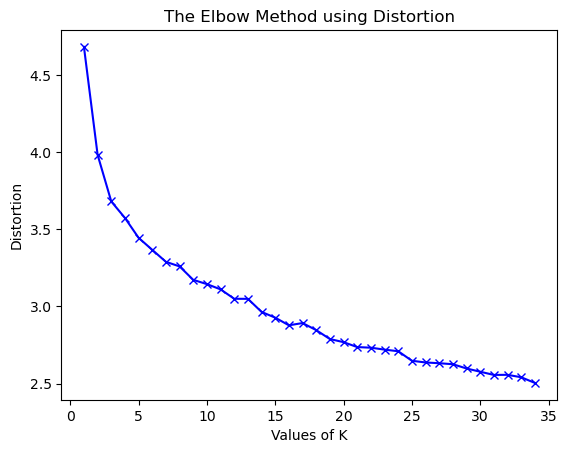

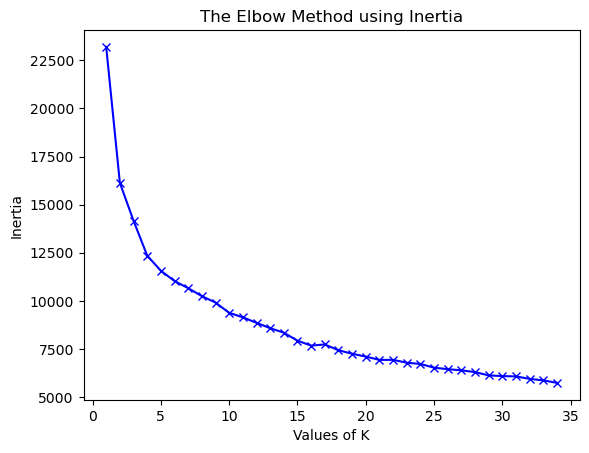

In [116]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [117]:
# 1) KMeans: 20 is good value
# Experiments 3&4
kmeans = KMeans(n_clusters=20, random_state=5) # hyperparameter !! Try and Error (Experiments 3&4) 1 -> 23 (12)

X_train["Cluster"] = kmeans.fit_predict(X_train)
X_test["Cluster"] = kmeans.predict(X_test) # prevent data leakage

X_train["Cluster"] = X_train["Cluster"].astype("int32")
X_test["Cluster"] = X_test["Cluster"].astype("int32")

X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Cluster
0,0.635890,-0.650608,0.829410,-0.211310,0.083621,1.237241,0.213748,0.033613,1.322554,0.584662,...,-0.073873,0.608782,-0.160868,-0.701264,0.877947,-0.192527,0.015624,-0.051164,-1.231617,14
1,0.649399,-0.429841,0.541697,-0.443726,0.516634,0.850523,0.473083,-0.098249,0.372877,0.653773,...,-0.117396,-0.083703,-0.128572,-2.170400,0.917206,-0.764815,-0.063488,-0.080645,0.272444,19
2,0.336767,-0.218443,0.393436,-0.779307,0.456912,-0.194199,0.602568,-0.283904,0.465002,0.487702,...,0.338664,0.187496,0.130735,-0.178142,-1.421430,0.316037,0.061109,0.228900,0.453752,9
3,0.437295,-0.903279,0.252152,-1.797801,0.963462,0.213429,0.489224,-0.145596,0.545394,0.562614,...,-0.035151,0.997090,0.319234,-1.535041,-2.400949,-1.932848,0.156635,0.212825,-0.283347,19
4,0.327218,-0.475900,0.663167,-0.785594,0.350717,0.390089,0.694764,-0.105667,0.358479,0.471443,...,-0.000251,0.297784,0.305146,0.141445,-0.117277,0.651490,-0.178742,-0.040331,1.143758,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-2.559045,1.851900,-2.444946,2.242689,-2.874524,-1.248725,-2.417251,1.656210,-3.033937,-2.513432,...,0.464421,-1.137319,-1.934730,1.268535,-2.113945,-1.033709,-2.196786,-2.596648,1.478347,5
796,0.097873,0.448033,-0.163204,0.184393,-0.130585,-0.955480,-0.269157,0.279989,-0.066689,-0.931438,...,0.215306,-0.533070,0.039526,0.229865,0.049123,0.568328,0.334197,0.404147,-1.231617,13
797,-0.873183,1.188723,-1.186204,0.606925,-1.071868,-1.413919,-0.723948,1.098726,-0.518885,-0.798712,...,0.331938,-0.645846,0.210421,0.002648,0.521156,-0.624840,1.139929,0.520687,0.809402,15
798,-0.570466,1.058327,-1.017115,1.908060,-0.669114,-0.471126,-0.724765,0.764809,-1.091252,-0.901236,...,0.434751,0.202913,0.290667,-0.815801,-0.190999,0.810490,-0.409094,-2.365007,0.902359,15


In [118]:
# 2) No PCA
std_scale_cluster = StandardScaler()

columns = X_train.columns

listo = np.array(X_train['Cluster']).reshape(-1, 1) # added 1 more axis to pass to std_scaler
listo_test = np.array(X_test['Cluster']).reshape(-1, 1)
X_train['Cluster'] = std_scale_cluster.fit_transform(listo)
X_test['Cluster'] = std_scale_cluster.transform(listo_test)

X_train


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Cluster
0,0.635890,-0.650608,0.829410,-0.211310,0.083621,1.237241,0.213748,0.033613,1.322554,0.584662,...,-0.073873,0.608782,-0.160868,-0.701264,0.877947,-0.192527,0.015624,-0.051164,-1.231617,0.769354
1,0.649399,-0.429841,0.541697,-0.443726,0.516634,0.850523,0.473083,-0.098249,0.372877,0.653773,...,-0.117396,-0.083703,-0.128572,-2.170400,0.917206,-0.764815,-0.063488,-0.080645,0.272444,1.651893
2,0.336767,-0.218443,0.393436,-0.779307,0.456912,-0.194199,0.602568,-0.283904,0.465002,0.487702,...,0.338664,0.187496,0.130735,-0.178142,-1.421430,0.316037,0.061109,0.228900,0.453752,-0.113186
3,0.437295,-0.903279,0.252152,-1.797801,0.963462,0.213429,0.489224,-0.145596,0.545394,0.562614,...,-0.035151,0.997090,0.319234,-1.535041,-2.400949,-1.932848,0.156635,0.212825,-0.283347,1.651893
4,0.327218,-0.475900,0.663167,-0.785594,0.350717,0.390089,0.694764,-0.105667,0.358479,0.471443,...,-0.000251,0.297784,0.305146,0.141445,-0.117277,0.651490,-0.178742,-0.040331,1.143758,-1.172233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-2.559045,1.851900,-2.444946,2.242689,-2.874524,-1.248725,-2.417251,1.656210,-3.033937,-2.513432,...,0.464421,-1.137319,-1.934730,1.268535,-2.113945,-1.033709,-2.196786,-2.596648,1.478347,-0.819217
796,0.097873,0.448033,-0.163204,0.184393,-0.130585,-0.955480,-0.269157,0.279989,-0.066689,-0.931438,...,0.215306,-0.533070,0.039526,0.229865,0.049123,0.568328,0.334197,0.404147,-1.231617,0.592846
797,-0.873183,1.188723,-1.186204,0.606925,-1.071868,-1.413919,-0.723948,1.098726,-0.518885,-0.798712,...,0.331938,-0.645846,0.210421,0.002648,0.521156,-0.624840,1.139929,0.520687,0.809402,0.945862
798,-0.570466,1.058327,-1.017115,1.908060,-0.669114,-0.471126,-0.724765,0.764809,-1.091252,-0.901236,...,0.434751,0.202913,0.290667,-0.815801,-0.190999,0.810490,-0.409094,-2.365007,0.902359,0.945862


In [119]:
X_train.describe()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Cluster
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,...,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,-7.639722e-17,-2.589595e-16,7.632783e-17,-2.495226e-16,1.432188e-16,-7.466250e-17,-1.707662e-16,1.143443e-16,3.080869e-17,-5.204170e-18,...,1.649722e-17,-5.044576e-17,2.568041e-17,1.110223e-18,-9.020562e-18,2.924744e-17,4.024558e-18,3.719247e-17,-8.213048e-17,1.276756e-16
std,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,...,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00
min,-5.100560e+00,-4.198595e+00,-4.448700e+00,-1.898984e+00,-4.827932e+00,-3.344258e+00,-7.054399e+00,-9.835428e+00,-5.102464e+00,-4.844743e+00,...,-1.096581e+01,-8.805563e+00,-1.615102e+01,-3.547388e+00,-7.062316e+00,-2.714446e+00,-7.644883e+00,-6.093958e+00,-1.587166e+00,-1.701756e+00
25%,-6.506631e-02,-5.146791e-01,-2.566422e-01,-7.409037e-01,-2.984883e-02,-5.158020e-01,-6.186404e-02,-1.741902e-01,-4.155042e-01,-3.974372e-01,...,-1.868200e-01,-5.588095e-01,-1.717659e-01,-5.912016e-01,-4.998355e-01,-6.488802e-01,-1.694360e-01,-2.242173e-01,-1.024086e+00,-8.192171e-01
50%,2.866805e-01,-2.342767e-01,3.716184e-01,-3.175473e-01,2.582532e-01,3.446647e-02,3.554136e-01,-8.422551e-02,2.234530e-01,4.353029e-01,...,-3.826901e-02,-3.610441e-02,2.009320e-02,1.197293e-01,5.659031e-02,-7.804689e-02,-4.405726e-02,-7.530445e-03,8.791830e-03,6.332220e-02
75%,6.023484e-01,2.816193e-01,6.108565e-01,6.219844e-01,4.788353e-01,4.693059e-01,5.130133e-01,1.018680e-01,5.888632e-01,6.271395e-01,...,2.060647e-01,5.019969e-01,1.973022e-01,7.493121e-01,5.489360e-01,6.400965e-01,3.352178e-01,4.007451e-01,8.094024e-01,7.693537e-01
max,8.515916e-01,5.529992e+00,1.052239e+00,3.044188e+00,2.974835e+00,4.208150e+00,1.540179e+00,4.611817e+00,4.430481e+00,3.281777e+00,...,1.285895e+01,8.240918e+00,5.450639e+00,2.210259e+00,3.207624e+00,5.661274e+00,3.070598e+00,6.894896e+00,2.538605e+00,1.651893e+00


In [120]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
# 3) MI scores to select relevent features
mi_scores = make_mi_scores(X_train, y_train['Class'], discrete_features=False)
mi_scores

V14        0.464884
V17        0.458456
Cluster    0.428553
V10        0.423329
V12        0.414617
V4         0.408928
V11        0.377874
V3         0.358641
V16        0.343321
V7         0.289980
V2         0.274796
V9         0.251231
V21        0.224335
V27        0.211911
V18        0.202141
V28        0.186072
V1         0.183484
V6         0.172045
V5         0.170934
Amount     0.130322
V19        0.114403
V8         0.110075
V20        0.108623
V24        0.071763
V23        0.037320
V26        0.026547
V22        0.025264
V25        0.023838
V15        0.015514
V13        0.012955
Name: MI Scores, dtype: float64

**Notes:**

* Target Imbalanced done b4 standardScaler (you could upsampling test also gives more confident on results)

# * Modeling

**Underfit soln**: more complex (increase layers/units) - more points - search for another arch 

**Overfit soln**: regularization - more points (un-biased / augmentation) - search for another arch

* 1) Try all calssification model get best baseline acc
* 2) hyperparameters tunning (random + gridsearch)
* 3) Evalution metric to descide which is best
* 4) Try all experiments you want to make

In [121]:
def classification_result(y_test, y_pred, prob, plot_roc=True):
    print('Test Accuracy:', accuracy_score(y_test, y_pred) * 100)
    print('F1 score:', f1_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))
    clf_report = classification_report(y_test, y_pred, target_names=['Transaction','Fraud'], output_dict=True)
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
    plt.show()
    print()
    print()
    print()
    
    if plot_roc == True:
        #curve of TPR vs FPR on Ytest vs predictions of knn_model
        plt.style.use('seaborn') #use seaborn style
        fpr, tpr, thershold = roc_curve(y_test, prob)
        # auc_value = roc_auc_score(y_test, y_pred)
        auc_value = auc(fpr, tpr)
        template_str = "AUC = {}".format(auc_value)
        #plot
        plt.plot(fpr, tpr, 'g-', label="AUC = %0.2f" % auc_value)
        #properties
        plt.grid()
        plt.legend(loc = 'lower right')
        plt.xlabel("False Postive Rate")
        plt.ylabel("True Postive Rate")
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.title('Receiver Operating Characteristic')
        plt.show()

In [122]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

# Decision Tree

Test Accuracy: 89.76491735100271
F1 score: 0.028762541806020066
Recall: 0.8269230769230769
Precision: 0.014635806671204902

 confussion matrix:
 [[25426  2895]
 [    9    43]]


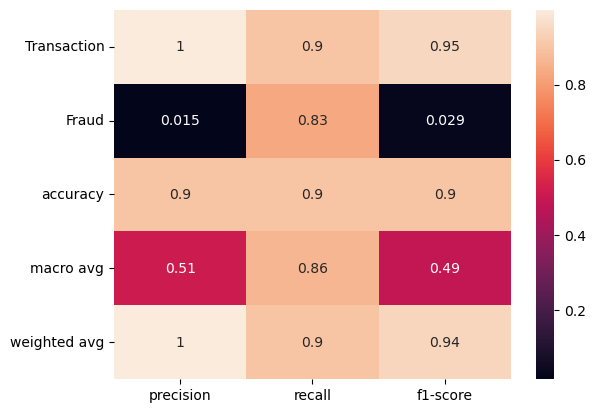

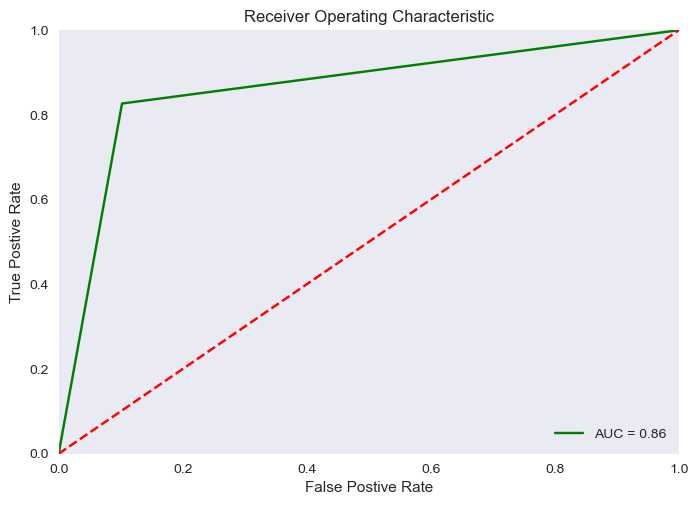

In [123]:
#Decission Tree
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)
y_pred_prob = DT_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob)

# Random Forest

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test Accuracy: 97.8571176823036
F1 score: 0.13142857142857142
Recall: 0.8846153846153846
Precision: 0.07098765432098765

 confussion matrix:
 [[27719   602]
 [    6    46]]


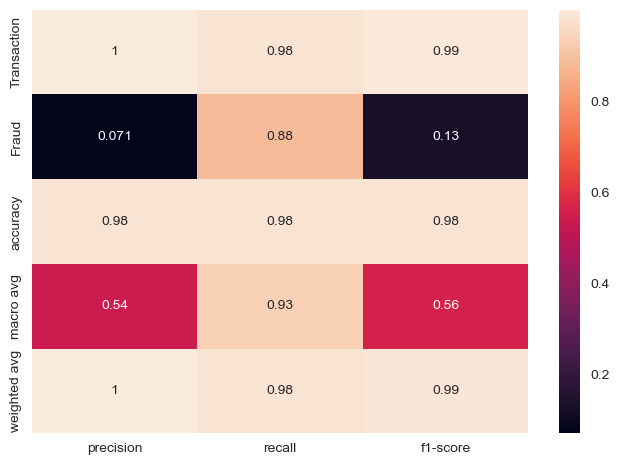

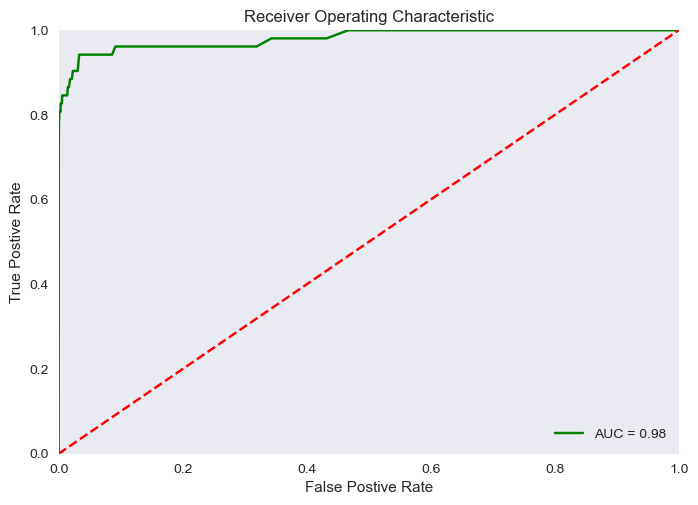

In [124]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob)

# Logestic_regreesion

Test Accuracy: 97.28262785042118
F1 score: 0.10452961672473868
Recall: 0.8653846153846154
Precision: 0.05562422744128554

 confussion matrix:
 [[27557   764]
 [    7    45]]


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


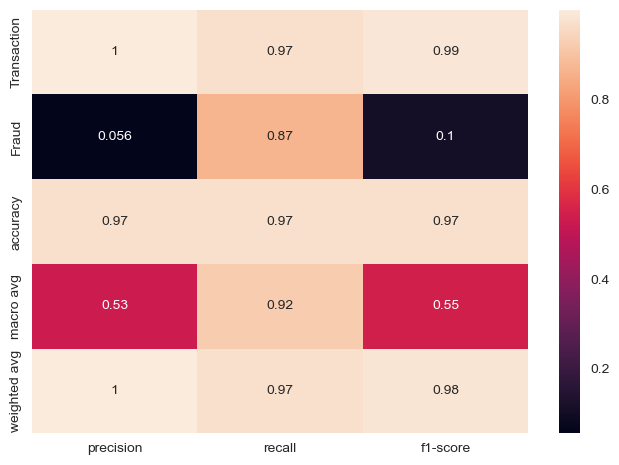

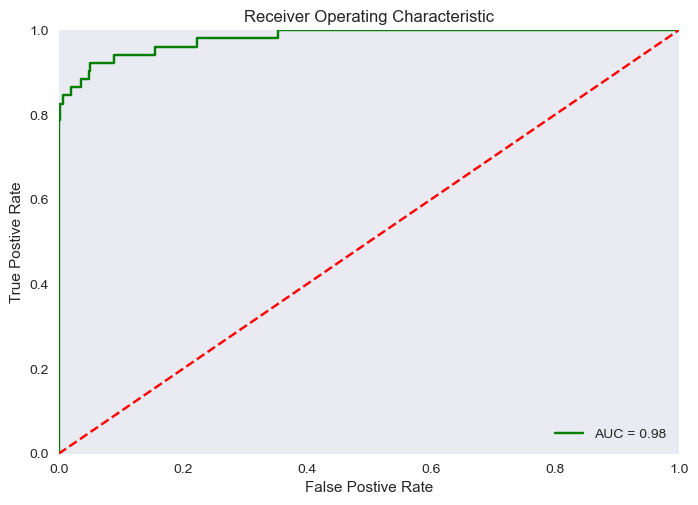

In [125]:
logestic_model = LogisticRegression()
logestic_model.fit(X_train, y_train)
y_pred = logestic_model.predict(X_test)
y_pred_prob = logestic_model.predict_proba(X_test)
prob = y_pred_prob[:, 1]
classification_result(y_test, y_pred, prob, plot_roc=True)

